DATA ANALYTICS PROJECT: ZOMATO DATA ANALYSIS USING PYTHON


The main reason for the analysis is to find out:

1.Do a greater number of restaurants provide online delivery as opposed to offline services?
2.
Which types of restaurants are the most favored by the general public

3.
What price range is preferred by couples for food at restaurants?5

In [9]:
#Step 1: Import necessary Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#importing the data 
df = pd.read_csv("C:/Users/arjun/Desktop/data analytics projects/Zomato-data-.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [17]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [ ]:
# There is no null value in the dataframe

In [25]:
#convertig the datatype of rate into float and removing the denominator 

def ratehandling(value):
    value=str(value).split('/')[0]
    return float(value)

df['rate']=df['rate'].apply(ratehandling)
df.sample(6)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
42,McDonald's,Yes,No,3.9,286,500,Dining
88,Dessert Rose,No,No,3.5,7,500,Dining
93,Thanco's Natural Ice Creams,No,No,3.2,9,300,Dining
137,Hotel Andhra Speices,No,No,2.9,0,250,Dining
121,New Mangalore Lunch Home,No,No,3.3,7,200,Dining
113,Dharwad Line Bazaar Mishra Pedha,No,No,3.4,0,150,Dining


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Data Visualisations

1.Under which category does most of the restaurant falls under and most votes given by individuals?

C:\Users\arjun\AppData\Local\Temp\ipykernel_15780\3431182137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['listed_in(type)'], palette="muted")


Text(0.5, 0, 'Types of Restaurant')

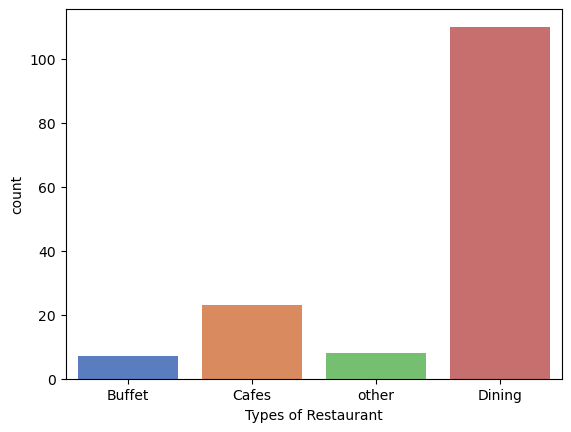

In [57]:
sns.countplot(x = df['listed_in(type)'], palette="muted")
plt.xlabel('Types of Restaurant')
              

Conclusion: The majority of the restaurants fall into the dining category

Text(0, 0.5, 'Votes')

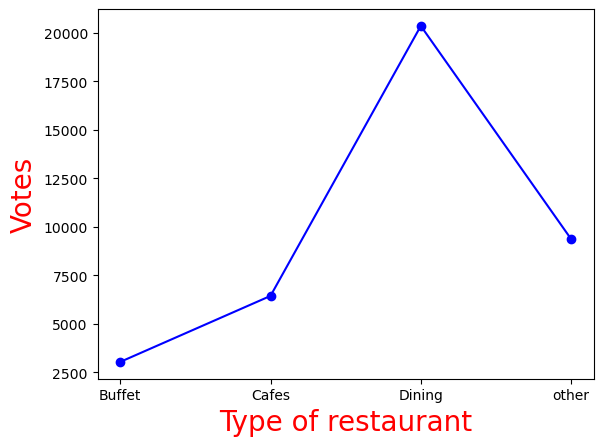

In [86]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result.index, result['votes'], c='blue', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

Conclusion: Dining restaurants are preferred by a larger number of individuals.



2.Determine the restaurant’s name that received the maximum votes based on a given data.

In [70]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurants with the maximum votes:')
print(restaurant_with_max_votes)


Restaurants with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Conclusion: Empire restaurant is considered to be the most liked restaurant

3.Does majority of the restaurants take online orders?

C:\Users\arjun\AppData\Local\Temp\ipykernel_15780\2301430631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette= "deep")


<Axes: xlabel='online_order', ylabel='count'>

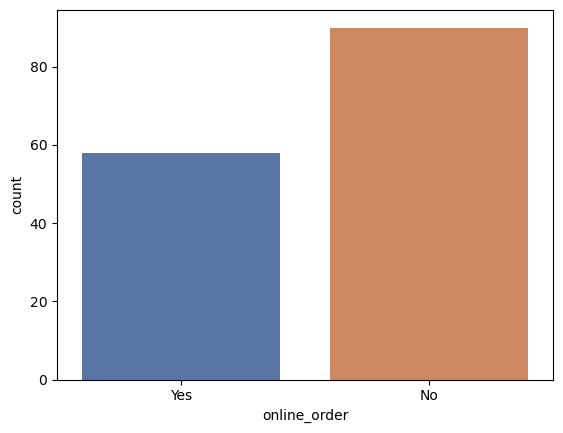

In [82]:
sns.countplot(x=df['online_order'], palette= "deep")

Conclusion: Most of the restaurants doesnt accept online orders

4.what is the range of rating for most of the restaurants

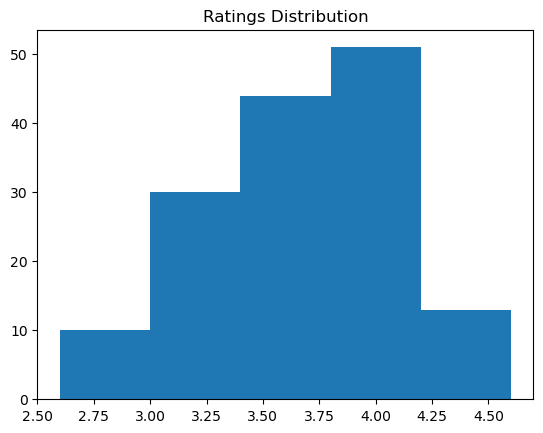

In [90]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()


Conclusion: Most of the restaurants are getting rating between 3.50 to 4

5.What price range is preferred by couples for their food at restaurants?

C:\Users\arjun\AppData\Local\Temp\ipykernel_15780\2479137264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_price, palette = "deep")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

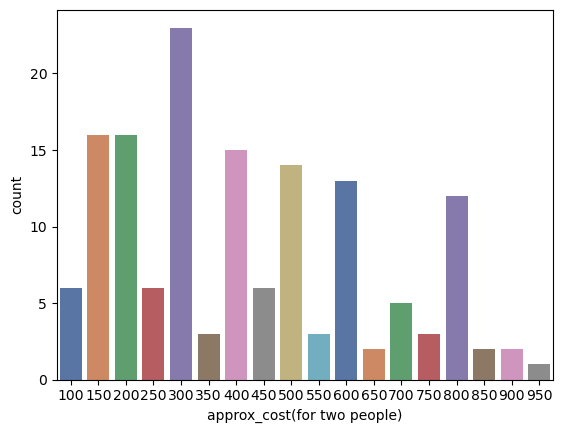

In [98]:
couple_price = df["approx_cost(for two people)"]
sns.countplot(x=couple_price, palette = "deep")

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

6.Comparison between ratings got on online orders and offline orders

C:\Users\arjun\AppData\Local\Temp\ipykernel_15780\3946264687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = df, palette="deep")


<Axes: xlabel='online_order', ylabel='rate'>

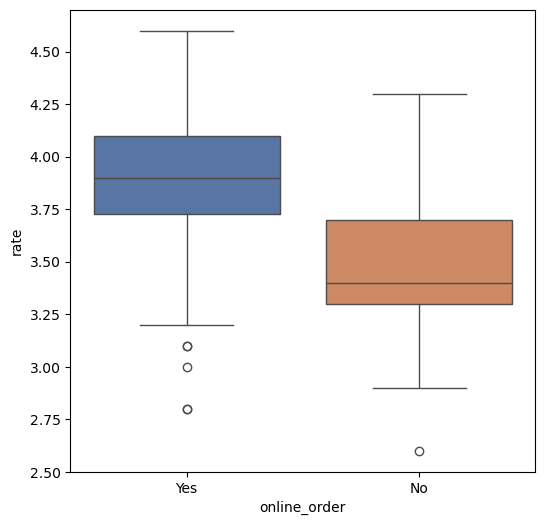

In [106]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df, palette="deep")


Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.